In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\amina\OneDrive\Desktop\BTCUSDT.csv').iloc[-365:]

In [3]:
to_drop = ['Unnamed: 0', 'o', 'h', 'l', 'v', 'close_time', 'qav', 'num_trades', 'taker_base_vol', 'taker_quote_vol', 'ignore', 'open_time']
data = data.drop(to_drop, axis=1)

<AxesSubplot:>

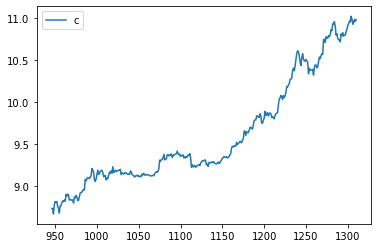

In [4]:
np.log(data).plot()

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
adfuller(data)[1]

0.9989726334339915

In [7]:
data = np.log(data)
data = data.diff(1).dropna()

In [8]:
adfuller(data)

(-20.296394749984874,
 0.0,
 0,
 363,
 {'1%': -3.448493650810824,
  '5%': -2.8695352280356556,
  '10%': -2.5710293341377715},
 -1324.702529230682)

<AxesSubplot:>

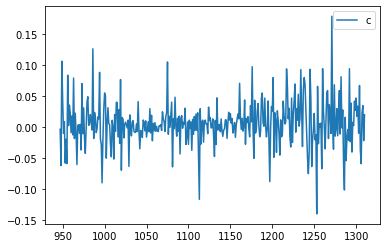

In [9]:
data.plot()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

[]

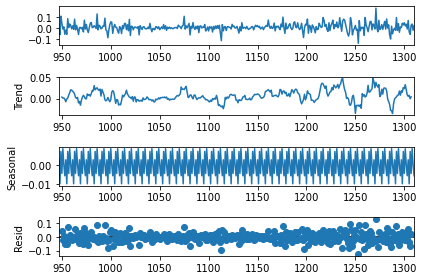

In [11]:
seasonal_decompose(data, period=7).plot()
plt.plot()

In [12]:
data

,c
947,-0.003450
948,-0.061802
949,0.106115
950,0.042000
951,-0.010027
...,...
1306,-0.058723
1307,0.023032
1308,0.034753
1309,-0.021703


In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

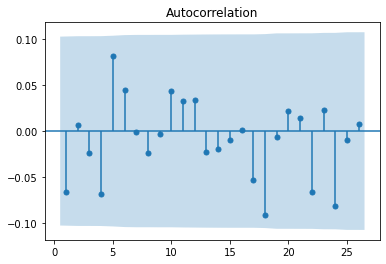

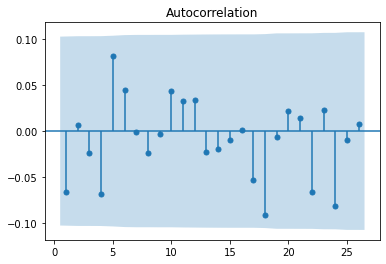

In [14]:
plot_acf(data, zero=False)

<AxesSubplot:>

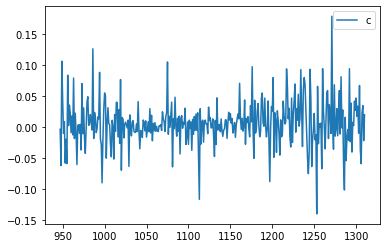

In [15]:
data.plot()

In [16]:
import pmdarima as pm

In [17]:
data = pd.read_csv(r'C:\Users\amina\OneDrive\Desktop\BTCUSDT.csv')
data = data.drop(to_drop, axis=1)
data = np.log(data)

In [18]:
results = pm.auto_arima(data, seasonal=True, m=7, trend='c', score='mae', n_jobs=-1)

C:\Users\amina\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


In [19]:
results.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 7),
 'start_params': None,
 'suppress_warnings': True,
 'trend': 'c',
 'with_intercept': False}

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [21]:
model= SARIMAX(data, order=(2, 1, 0), seasonal_order=(0, 0, 0, 7), trend='c')

In [22]:
results = model.fit()

In [23]:
pred = results.get_forecast(steps = 365)

In [24]:
conf = pred.conf_int()
mean = pred.predicted_mean

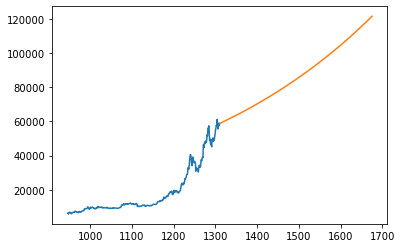

In [25]:
plt.plot(data.iloc[-365:].index, np.e**data.iloc[-365:])
plt.plot(mean.index, np.e**mean)
#plt.fill_between(conf['lower c'].index, np.e**conf['lower c'], np.e**conf['upper c'])
plt.show()

In [26]:
np.e**conf['lower c'].iloc[-1]

23906.197449557258

In [27]:
np.e**conf['upper c'].iloc[-1]

618532.0118554193